In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb
import xgboost as xgb

# Exploratory Data Analysis (EDA):
### 1.	Load the Titanic dataset using Python's pandas library.
### 2.	Check for missing values.
### 3.	Explore data distributions using histograms and box plots.
### 4.	Visualize relationships between features and survival using scatter plots and bar plots.

In [147]:
test_data  = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

In [148]:
train_data = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")

In [149]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [150]:
# checking for the missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
# filling the missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

In [152]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [153]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [155]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,2.232906e-16,0.523008,0.381594,3.987333e-18
std,257.353842,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00


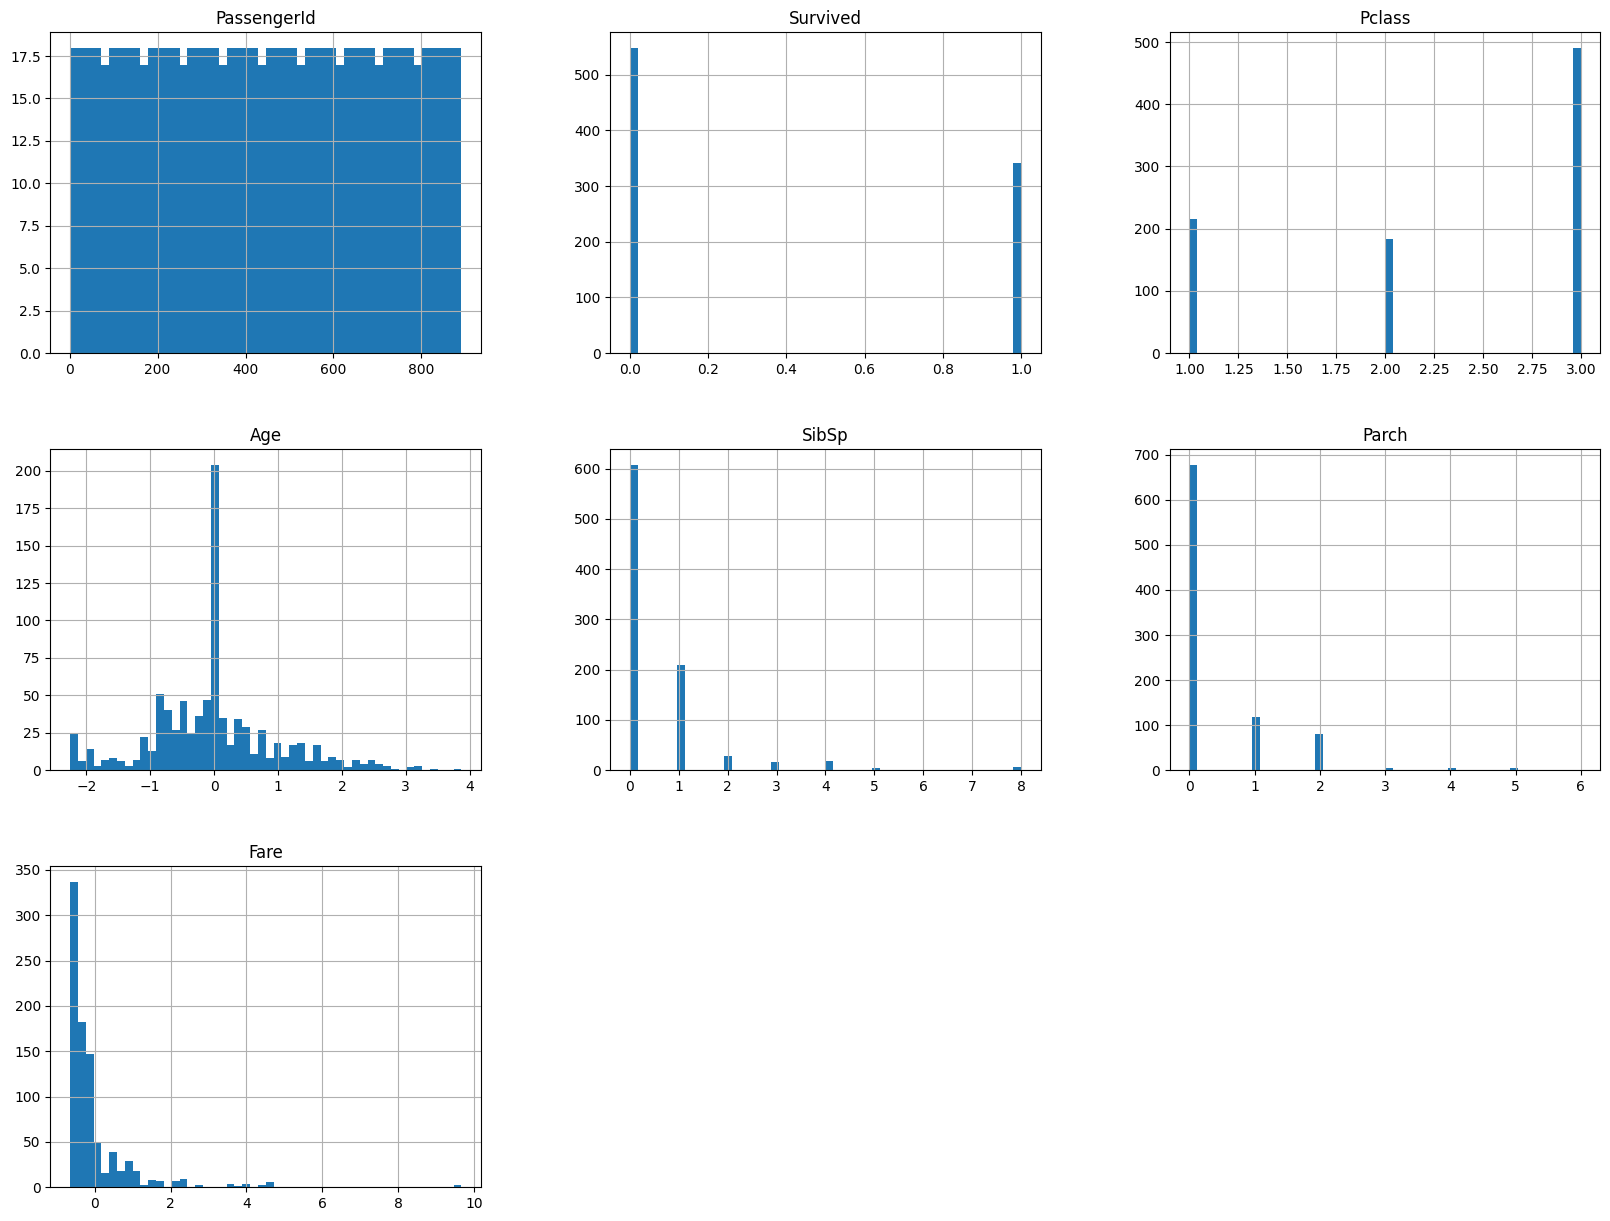

In [156]:
# Histograms
train_df.hist(bins=50, figsize=(20,15))
plt.show()

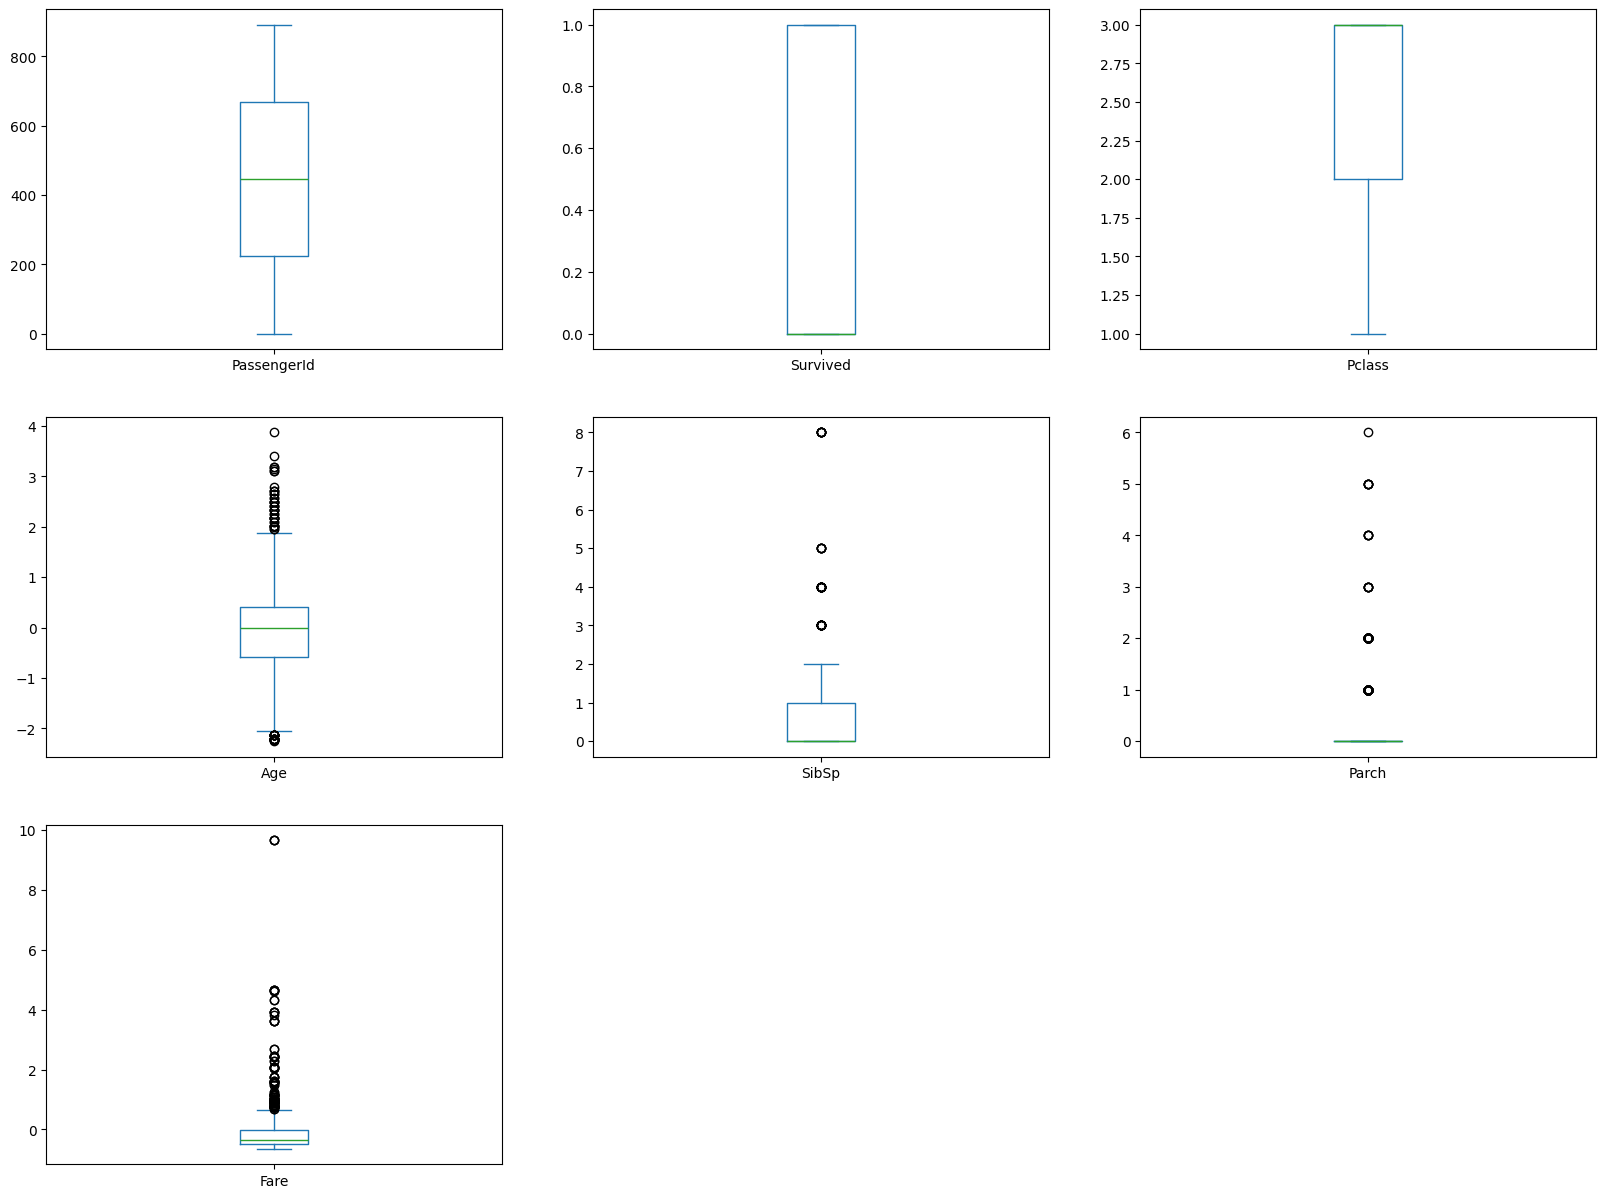

In [157]:
# Box plots
box = train_df.plot(kind='box', subplots=True, layout=(3,3), figsize=(20,15))

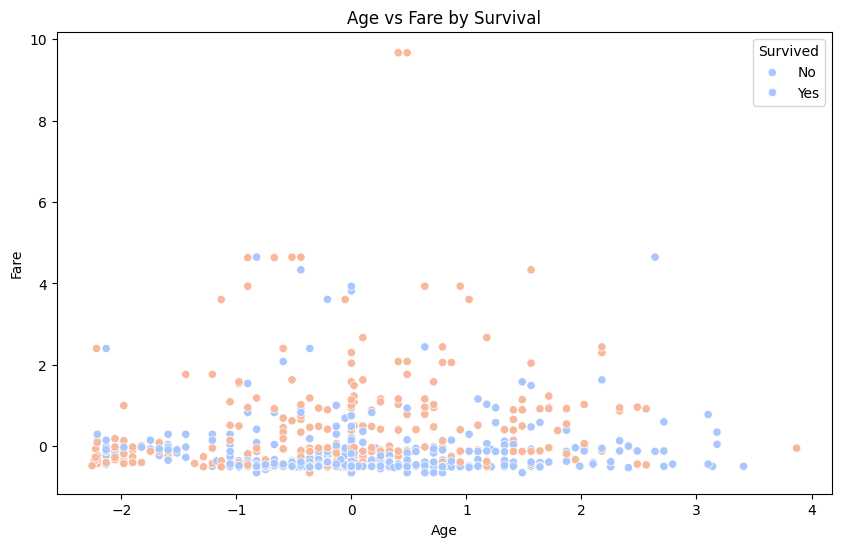

In [158]:
# Scatter plot of Age vs Fare, colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_4864\1394744900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Embarked', y='Survived', palette='coolwarm')


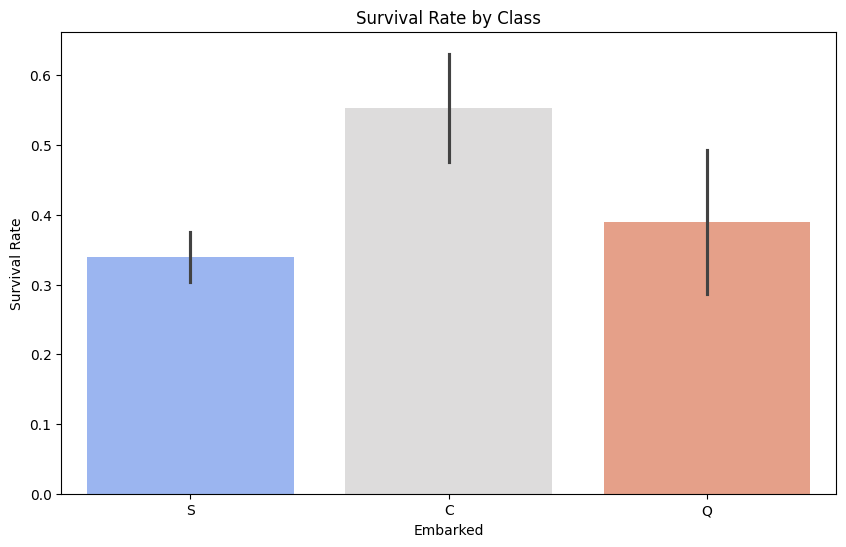

In [159]:
# Bar plot of Survival by Class
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Embarked', y='Survived', palette='coolwarm')
plt.title('Survival Rate by Class')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_4864\3744568977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Sex', y='Survived', palette='coolwarm')


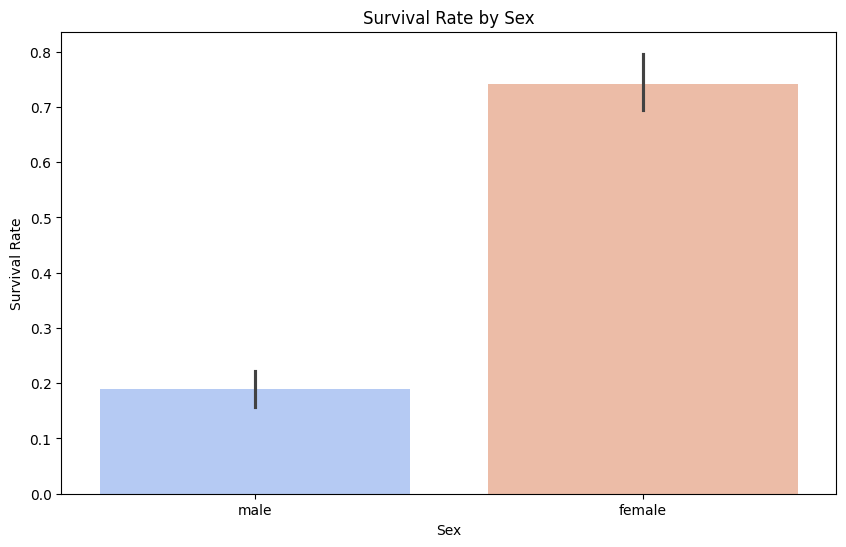

In [160]:
# Bar plot of Survival by Sex
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Sex', y='Survived', palette='coolwarm')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Data Preprocessing:
### 1.	Impute missing values.
### 2.	Encode categorical variables using one-hot encoding or label encoding. 
### 3.	If needed you can apply more preprocessing methods on the given dataset.

In [161]:
# Encode categorical variables using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Building Predictive Models:
### 1.	Split the preprocessed dataset into training and testing sets.
### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
### 3.	Build predictive models using LightGBM and XGBoost algorithms.
### 4.	Train the models on the training set and evaluate their performance on the testing set.
### 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [162]:
X = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = train_data['Survived']

In [163]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (712, 8)
X_val shape: (179, 8)
y_train shape: (712,)
y_val shape: (179,)


In [164]:
# Defining the parameters
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.9
}

# Create the datasets
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

# Defining the early stopping callback
early_stopping = lgb.early_stopping(stopping_rounds=10)

# Train the LightGBM model
lgb_model = lgb.train(
    lgb_params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_val,
    callbacks=[early_stopping]
)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [165]:
# Set XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(**xgb_params, n_estimators=1000, early_stopping_rounds=10)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)


[0]	validation_0-logloss:0.65776
[1]	validation_0-logloss:0.63926
[2]	validation_0-logloss:0.62209
[3]	validation_0-logloss:0.60762
[4]	validation_0-logloss:0.59462
[5]	validation_0-logloss:0.58136
[6]	validation_0-logloss:0.56895
[7]	validation_0-logloss:0.56260
[8]	validation_0-logloss:0.55074
[9]	validation_0-logloss:0.54534
[10]	validation_0-logloss:0.53539
[11]	validation_0-logloss:0.52726
[12]	validation_0-logloss:0.52360
[13]	validation_0-logloss:0.51588
[14]	validation_0-logloss:0.50799
[15]	validation_0-logloss:0.50208
[16]	validation_0-logloss:0.49518
[17]	validation_0-logloss:0.49037
[18]	validation_0-logloss:0.48358
[19]	validation_0-logloss:0.47748
[20]	validation_0-logloss:0.47439
[21]	validation_0-logloss:0.47091
[22]	validation_0-logloss:0.46614
[23]	validation_0-logloss:0.46169
[24]	validation_0-logloss:0.45869
[25]	validation_0-logloss:0.45437
[26]	validation_0-logloss:0.45283
[27]	validation_0-logloss:0.44978
[28]	validation_0-logloss:0.44725
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [166]:
# Make predictions on the validation set
lgb_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
xgb_pred = xgb_model.predict(X_val)

# Convert LightGBM probabilities to binary outputs (threshold = 0.5)
lgb_pred_binary = [1 if pred > 0.5 else 0 for pred in lgb_pred]

In [167]:
# Evaluate LightGBM
print("LightGBM Accuracy: ", accuracy_score(y_val, lgb_pred_binary))
print("LightGBM Precision: ", precision_score(y_val, lgb_pred_binary))
print("LightGBM Recall: ", recall_score(y_val, lgb_pred_binary))
print("LightGBM F1 Score: ", f1_score(y_val, lgb_pred_binary))

LightGBM Accuracy:  0.7988826815642458
LightGBM Precision:  0.7878787878787878
LightGBM Recall:  0.7027027027027027
LightGBM F1 Score:  0.7428571428571429


In [168]:
# Evaluate XGBoost
print("XGBoost Accuracy: ", accuracy_score(y_val, xgb_pred))
print("XGBoost Precision: ", precision_score(y_val, xgb_pred))
print("XGBoost Recall: ", recall_score(y_val, xgb_pred))
print("XGBoost F1 Score: ", f1_score(y_val, xgb_pred))


XGBoost Accuracy:  0.8100558659217877
XGBoost Precision:  0.8125
XGBoost Recall:  0.7027027027027027
XGBoost F1 Score:  0.7536231884057971


# Comparative Analysis:
### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

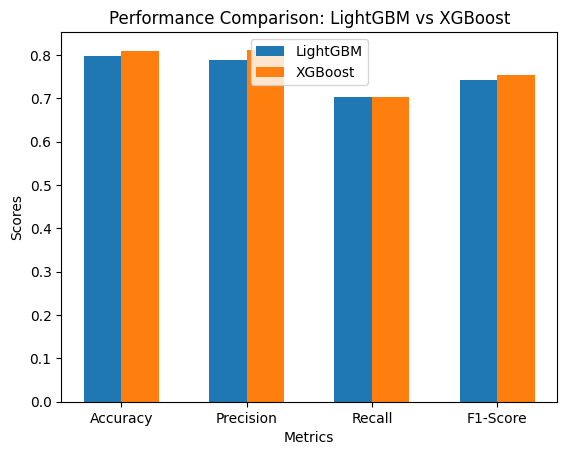

In [169]:
# Define the performance metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

lgbm_metrics = [accuracy_score(y_val, lgb_pred_binary),
                precision_score(y_val, lgb_pred_binary),
                recall_score(y_val, lgb_pred_binary),
                f1_score(y_val, lgb_pred_binary)]

xgb_metrics = [accuracy_score(y_val, xgb_pred),
               precision_score(y_val, xgb_pred),
               recall_score(y_val, xgb_pred),
               f1_score(y_val, xgb_pred)]

# Plotting the comparison
x = np.arange(len(metrics))
width = 0.3

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, lgbm_metrics, width, label='LightGBM')
bar2 = ax.bar(x + width/2, xgb_metrics, width, label='XGBoost')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: LightGBM vs XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
